# QF 625 Introduction to Programming
## Exercise 2 | `Answers`

> Hi Team!

> The current script is prepared to help you to further exercise course content, so that you are well prepared for your forthcoming assessment sessions. (But do note that these are not assessment questions. They are for your exercise.) 

> Some of the questions ask you to perform reverse-engineering. Instead of a question written in text format, you will be given the end results of some lines of code. Your task is to fill in the input cell with lines of code to create the output cell. Such a reverse-engineering exercise in computational programming will maximize your knowledge and skills in Python programming. 

> The questions below won’t be that difficult, as you have learned how to answer them from the lessons and the assigned readings. As you will notice from the questions, my intention is not just to give questions, but also to give additional learning pointers. I hope this helps.

> The answers will be released on Friday. Enjoy.

##### First, let's do some quick exercise with stock prices data.

### Let's import necessry packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

> Let's set some print option.

In [2]:
pd.set_option("display.max_rows", 30)
pd.set_option("display.min_rows", 25)
pd.set_option("display.max_columns", 15)
pd.set_option("precision", 3)

### Let's try to import historical stock data from the web and from your machine.

#### How to import from the Web

> You need to have `pandas_datareader` module.

In [3]:
import pandas_datareader.data as web

> Let's start & end dates--we are interested in year 2020 until August.

In [4]:
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2020, 8, 31)

> Then, let's use [Yahoo! Finance](https://sg.finance.yahoo.com/) for extracting historical stock data.

In [5]:
apple = web.DataReader("AAPL", "yahoo", start, end)
google = web.DataReader("GOOGL", "yahoo", start, end)

> You may save the data to csv files.

In [6]:
apple.to_csv("apple_2020_stock.csv")
google.to_csv("google_2020_stock.csv")

> Let's read the stored files.

In [7]:
apple_2020 = pd.read_csv("apple_2020_stock.csv", index_col=0, parse_dates=True)
google_2020 = pd.read_csv("google_2020_stock.csv", index_col=0, parse_dates=True)

#### Have a quick look at your data.

In [8]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,73.420,72.380,72.482,73.412,1.008e+08,72.910
2020-01-02,75.150,73.798,74.060,75.088,1.355e+08,74.573
2020-01-03,75.145,74.125,74.287,74.357,1.463e+08,73.848
2020-01-06,74.990,73.188,73.448,74.950,1.184e+08,74.436
2020-01-07,75.225,74.370,74.960,74.598,1.089e+08,74.086


In [9]:
google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,1340.66,1332.13,1335.79,1339.39,975700,1339.39
2020-01-02,1368.68,1346.49,1348.41,1368.68,1363900,1368.68
2020-01-03,1373.75,1347.32,1348.00,1361.52,1170400,1361.52
2020-01-06,1398.32,1351.00,1351.63,1397.81,2338400,1397.81
2020-01-07,1403.50,1391.56,1400.46,1395.11,1716500,1395.11


In [10]:
apple.describe()

,High,Low,Open,Close,Volume,Adj Close
count,169.000,169.000,169.000,169.000,1.690e+02,169.000
mean,84.347,82.046,83.065,83.317,1.511e+08,83.058
std,16.218,16.129,16.245,16.248,6.255e+07,16.342
min,57.125,53.153,57.020,56.092,4.689e+07,55.840
25%,73.632,71.463,71.845,72.330,1.093e+08,72.005
50%,79.997,78.908,79.438,79.562,1.355e+08,79.166
75%,92.618,90.567,91.250,91.210,1.810e+08,91.046
max,131.000,126.000,128.697,129.040,4.017e+08,129.040


In [11]:
google.describe()

,High,Low,Open,Close,Volume,Adj Close
count,169.000,169.000,169.000,169.000,1.690e+02,169.000
mean,1413.096,1377.174,1394.600,1397.062,2.129e+06,1397.062
std,129.865,139.039,133.927,134.302,9.509e+05,134.302
min,1066.910,1008.870,1056.370,1054.130,9.757e+05,1054.130
25%,1353.630,1321.500,1335.790,1339.250,1.486e+06,1339.250
50%,1442.320,1419.190,1431.220,1431.730,1.802e+06,1431.730
75%,1510.000,1478.490,1492.790,1496.820,2.569e+06,1496.820
max,1652.790,1625.610,1646.610,1644.130,5.418e+06,1644.130


### We will `re-organize` and `re-shape` stock data

> Let's concatenate data in multiple DataFrame objects

> Let's obtain Apple adjusted close data for July and August 2020

In [12]:
apple_07 = apple["2020-07"][["Adj Close"]]
apple_08 = apple["2020-08"][["Adj Close"]]

In [13]:
apple_07.head()

,Adj Close
Date,
2020-07-01,90.864
2020-07-02,90.864
2020-07-06,93.294
2020-07-07,93.005
2020-07-08,95.171


In [14]:
apple_08.head()

,Adj Close
Date,
2020-08-03,108.741
2020-08-04,109.468
2020-08-05,109.864
2020-08-06,113.698
2020-08-07,111.113


### Question 1-1. Please combine the first three rows of each of `apple_07` and `apple_08`

In [15]:
pd.concat([apple_07.head(3), apple_08.head(3)])

,Adj Close
Date,
2020-07-01,90.864
2020-07-02,90.864
2020-07-06,93.294
2020-08-03,108.741
2020-08-04,109.468
2020-08-05,109.864


### Question 1-2. How would you extract only the 2020 August GOOGL values?

In [16]:
google_08 = google["2020-08"][["Adj Close"]]
google_08

,Adj Close
Date,
2020-08-03,1482.76
2020-08-04,1473.30
2020-08-05,1479.09
2020-08-06,1504.95
2020-08-07,1498.37
2020-08-10,1496.82
2020-08-11,1480.54
2020-08-12,1507.24
2020-08-13,1516.65


### Question 1-3. Please concatenate the AAPL and GOOGL 2020 August stock data--there will be duplicate index labels

In [17]:
duplicates = pd.concat([apple_08[:3], google_08[:3]])
duplicates

,Adj Close
Date,
2020-08-03,108.741
2020-08-04,109.468
2020-08-05,109.864
2020-08-03,1482.760
2020-08-04,1473.300
2020-08-05,1479.090


> Let's see the `two records for data of 2020-08-03`

In [18]:
duplicates.loc["2020-08-03"]

,Adj Close
Date,
2020-08-03,108.741
2020-08-03,1482.760


### Question 1-4. Please concatenate to show a specification of the stock tickets being part of the index. This will help disambiguate the duplicate dates using a hierarchal index.

In [19]:
closes = pd.concat([apple_08[:3], google_08[:3]], 
                    keys=["AAPL", "GOOGL"])
closes

Adj Close
      Date                 
AAPL  2020-08-03    108.741
      2020-08-04    109.468
      2020-08-05    109.864
GOOGL 2020-08-03   1482.760
      2020-08-04   1473.300
      2020-08-05   1479.090

> Let's extract just GOOGL values using .loc

In [20]:
closes.loc["GOOGL"][:3]

,Adj Close
Date,
2020-08-03,1482.76
2020-08-04,1473.30
2020-08-05,1479.09


### Question 1-5. Let's show concatenation using two DataFrame's that each have two columns.  `pandas` will align the data in columns by the column names (labels)

In [21]:
apple_av = apple[["Adj Close", "Volume"]]
google_av = google[["Adj Close", "Volume"]]
pd.concat([apple_av, google_av])

,Adj Close,Volume
Date,,
2019-12-31,72.910,1.008e+08
2020-01-02,74.573,1.355e+08
2020-01-03,73.848,1.463e+08
2020-01-06,74.436,1.184e+08
2020-01-07,74.086,1.089e+08
2020-01-08,75.278,1.321e+08
2020-01-09,76.877,1.701e+08
2020-01-10,77.051,1.406e+08
2020-01-13,78.697,1.215e+08


> Let's see concatenation with DataFrame objects that do not have the same set of columns.

> This will show pandas filling in NaN values.

In [22]:
google_a = google[["Adj Close"]]
pd.concat([apple_av, google_a])

,Adj Close,Volume
Date,,
2019-12-31,72.910,1.008e+08
2020-01-02,74.573,1.355e+08
2020-01-03,73.848,1.463e+08
2020-01-06,74.436,1.184e+08
2020-01-07,74.086,1.089e+08
2020-01-08,75.278,1.321e+08
2020-01-09,76.877,1.701e+08
2020-01-10,77.051,1.406e+08
2020-01-13,78.697,1.215e+08


### Question 2-1. Please perform an inner join on the DataFrame's since `google_a` does not have a Volume column, pandas will not include that column in the result.

In [23]:
pd.concat([apple_av, google_a], join="inner")

,Adj Close
Date,
2019-12-31,72.910
2020-01-02,74.573
2020-01-03,73.848
2020-01-06,74.436
2020-01-07,74.086
2020-01-08,75.278
2020-01-09,76.877
2020-01-10,77.051
2020-01-13,78.697


### Question 2-2. Then, please concatenate along the rows, causing duplicate columns to be created in the result.

In [24]:
apple_a = apple[["Adj Close"]]
closes = pd.concat([apple_a, google_a], axis=1)
closes.head()

,Adj Close,Adj Close
Date,,
2019-12-31,72.910,1339.39
2020-01-02,74.573,1368.68
2020-01-03,73.848,1361.52
2020-01-06,74.436,1397.81
2020-01-07,74.086,1395.11


### Question 2-3. Let's concat along rows using two DataFrame objects with different number of rows. 

### This demonstrates how NaN values will be filled in those rows for `apple` which only hase three rows as compared to 5 for `google`

In [25]:
pd.concat([apple_av[:5], google_av[:3]], axis=1,
          keys=["AAPL", "GOOGL"])

AAPL                GOOGL           
           Adj Close     Volume Adj Close     Volume
Date                                                
2019-12-31    72.910  1.008e+08   1339.39  9.757e+05
2020-01-02    74.573  1.355e+08   1368.68  1.364e+06
2020-01-03    73.848  1.463e+08   1361.52  1.170e+06
2020-01-06    74.436  1.184e+08       NaN        NaN
2020-01-07    74.086  1.089e+08       NaN        NaN

### Question 2-4. You know that `inner join` can also be used `along this axis`. 

### Please include rows with index labels that do not exist in both DataFrame objects

In [26]:
pd.concat([apple_a[:5], google_a[:3]], axis=1,
          join="inner", 
          keys=["AAPL", "GOOGL"])

,AAPL,GOOGL
,Adj Close,Adj Close
Date,,
2019-12-31,72.910,1339.39
2020-01-02,74.573,1368.68
2020-01-03,73.848,1361.52


### Question 2-5. Please ignore indexes and just concatenate the data and have the result have a default integer index

In [27]:
pd.concat([apple_a[:3], google_a[:3]], ignore_index=True)

,Adj Close
0,72.910
1,74.573
2,73.848
3,1339.390
4,1368.680
5,1361.520


### `Now let's merging DataFrame objects`

In [28]:
apple_ar = apple_a.reset_index()
apple_vr = apple[["Volume"]].reset_index()
apple_ar.head()

,Date,Adj Close
0,2019-12-31,72.910
1,2020-01-02,74.573
2,2020-01-03,73.848
3,2020-01-06,74.436
4,2020-01-07,74.086


### Question 3. Please merge the two DataFrame objects, so lets peek at the data to remind ourselves of what they contain.

###  `pandas` finds the columns in common, in this case Date, and merges on that column and adds a column for all the other columns in both DataFrame's.

In [29]:
apple_cvr = pd.merge(apple_ar, apple_vr)
apple_cvr[:5]

,Date,Adj Close,Volume
0,2019-12-31,72.910,1.008e+08
1,2020-01-02,74.573,1.355e+08
2,2020-01-03,73.848,1.463e+08
3,2020-01-06,74.436,1.184e+08
4,2020-01-07,74.086,1.089e+08


> We will see join using the DataFrame.

In [30]:
apple_ar05 = apple_ar[0:5]
apple_ar05

,Date,Adj Close
0,2019-12-31,72.910
1,2020-01-02,74.573
2,2020-01-03,73.848
3,2020-01-06,74.436
4,2020-01-07,74.086


> and also this one

In [31]:
apple_vr24 = apple_vr[2:4]
apple_vr24

,Date,Volume
2,2020-01-03,1.463e+08
3,2020-01-06,1.184e+08


### Question 3-2. Please use the merge function to create the below.

In [32]:
pd.merge(apple_ar05, apple_vr24)

,Date,Adj Close,Volume
0,2020-01-03,73.848,1.463e+08
1,2020-01-06,74.436,1.184e+08


### Question 3-3. How would you create the below then?

In [33]:
pd.merge(apple_ar05, apple_vr24, how="outer")

,Date,Adj Close,Volume
0,2019-12-31,72.910,NaN
1,2020-01-02,74.573,NaN
2,2020-01-03,73.848,1.463e+08
3,2020-01-06,74.436,1.184e+08
4,2020-01-07,74.086,NaN


### Let's do some `pivoting`

### Question 4-1. Please insert `Symbol` column before combining

In [34]:
apple.insert(0, "Symbol", "AAPL")
google.insert(0, "Symbol", "GOOGL")

### Question 4-2. Please concatenate the `Apple` and `Google` data index will consist of the Date column, which we will sort.

In [35]:
combined = pd.concat([apple, google]).sort_index()
combined

,Symbol,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2019-12-31,AAPL,73.420,72.380,72.482,73.412,1.008e+08,72.910
2019-12-31,GOOGL,1340.660,1332.130,1335.790,1339.390,9.757e+05,1339.390
2020-01-02,GOOGL,1368.680,1346.490,1348.410,1368.680,1.364e+06,1368.680
2020-01-02,AAPL,75.150,73.798,74.060,75.088,1.355e+08,74.573
2020-01-03,AAPL,75.145,74.125,74.287,74.357,1.463e+08,73.848
2020-01-03,GOOGL,1373.750,1347.320,1348.000,1361.520,1.170e+06,1361.520
2020-01-06,AAPL,74.990,73.188,73.448,74.950,1.184e+08,74.436
2020-01-06,GOOGL,1398.320,1351.000,1351.630,1397.810,2.338e+06,1397.810
2020-01-07,AAPL,75.225,74.370,74.960,74.598,1.089e+08,74.086


### Question 4-3. Please pushes the index into a column and resets to a default integer index.

In [36]:
combined_r = combined.reset_index();
combined_r.head() 

,Date,Symbol,High,Low,Open,Close,Volume,Adj Close
0,2019-12-31,AAPL,73.420,72.380,72.482,73.412,1.008e+08,72.910
1,2019-12-31,GOOGL,1340.660,1332.130,1335.790,1339.390,9.757e+05,1339.390
2,2020-01-02,GOOGL,1368.680,1346.490,1348.410,1368.680,1.364e+06,1368.680
3,2020-01-02,AAPL,75.150,73.798,74.060,75.088,1.355e+08,74.573
4,2020-01-03,AAPL,75.145,74.125,74.287,74.357,1.463e+08,73.848


### Question 4-4. Please pivot Date into the Index, make the columns match the unique values in the Symbol column, and the values will be the AdjClose values

In [37]:
closes = combined_r.pivot(index="Date", columns="Symbol", values="Adj Close")
closes.head()

Symbol,AAPL,GOOGL
Date,,
2019-12-31,72.910,1339.39
2020-01-02,74.573,1368.68
2020-01-03,73.848,1361.52
2020-01-06,74.436,1397.81
2020-01-07,74.086,1395.11


### Let's execute `stacking` and `unstacking`

### Question 5-1. Please stack the first level of columns into the index.

### Let's move AAPL and GOOGL into the index leaving a single colum which is the AdjClose values

In [38]:
stacked_Closes = closes.stack()
stacked_Closes

Date        Symbol
2019-12-31  AAPL        72.910
            GOOGL     1339.390
2020-01-02  AAPL        74.573
            GOOGL     1368.680
2020-01-03  AAPL        73.848
            GOOGL     1361.520
2020-01-06  AAPL        74.436
            GOOGL     1397.810
2020-01-07  AAPL        74.086
            GOOGL     1395.110
2020-01-08  AAPL        75.278
            GOOGL     1405.040
                        ...   
2020-08-24  AAPL       125.857
            GOOGL     1585.150
2020-08-25  AAPL       124.825
            GOOGL     1605.850
2020-08-26  AAPL       126.522
            GOOGL     1644.130
2020-08-27  AAPL       125.010
            GOOGL     1628.520
2020-08-28  AAPL       124.808
            GOOGL     1639.430
2020-08-31  AAPL       129.040
            GOOGL     1629.530
Length: 338, dtype: float64

> Using `.loc` we can retrieve close values by specifying both the date and ticker

In [39]:
stacked_Closes.loc["2020-01-02", "AAPL"]

74.57303619384766

### Question 5-2. Please lookup on just the date, which will give us two values one each for AAPL and GOOGL.  

In [40]:
stacked_Closes.at["2020-01-02"]

Symbol
AAPL       74.573
GOOGL    1368.680
dtype: float64

> Let's have a look at all values for the GOOGL symbol

In [41]:
stacked_Closes.loc[:, "GOOGL"]

Date
2019-12-31    1339.39
2020-01-02    1368.68
2020-01-03    1361.52
2020-01-06    1397.81
2020-01-07    1395.11
2020-01-08    1405.04
2020-01-09    1419.79
2020-01-10    1428.96
2020-01-13    1440.03
2020-01-14    1430.59
2020-01-15    1439.20
2020-01-16    1450.16
               ...   
2020-08-14    1504.63
2020-08-17    1516.24
2020-08-18    1555.78
2020-08-19    1544.61
2020-08-20    1576.25
2020-08-21    1575.57
2020-08-24    1585.15
2020-08-25    1605.85
2020-08-26    1644.13
2020-08-27    1628.52
2020-08-28    1639.43
2020-08-31    1629.53
Length: 169, dtype: float64

### Question 5-3. Please pivot the last level of the index back into a column

In [42]:
unstacked_Closes = stacked_Closes.unstack()
unstacked_Closes[:3]

Symbol,AAPL,GOOGL
Date,,
2019-12-31,72.910,1339.39
2020-01-02,74.573,1368.68
2020-01-03,73.848,1361.52


### Now, let's do some `melting`

### Question 6-1. Please use `melt` to make id_vars of Date and Symbol, making the column names the variable and the for each the value

In [43]:
melted = pd.melt(combined_r, id_vars=["Date", "Symbol"])
melted.head()

,Date,Symbol,variable,value
0,2019-12-31,AAPL,High,73.420
1,2019-12-31,GOOGL,High,1340.660
2,2020-01-02,GOOGL,High,1368.680
3,2020-01-02,AAPL,High,75.150
4,2020-01-03,AAPL,High,75.145


### Question 6-2. Please extract the values for the data for Google on 2020-08-25

In [44]:
melted[(melted.Date=="2020-08-25") & (melted.Symbol=="GOOGL")]

,Date,Symbol,variable,value
328,2020-08-25,GOOGL,High,1.609e+03
666,2020-08-25,GOOGL,Low,1.578e+03
1004,2020-08-25,GOOGL,Open,1.580e+03
1342,2020-08-25,GOOGL,Close,1.606e+03
1680,2020-08-25,GOOGL,Volume,1.258e+06
2018,2020-08-25,GOOGL,Adj Close,1.606e+03


### Let's do some grouping and aggregation

##### To do so, we will do some splitting first.

> Let's construct a DataFrame to demonstrate splitting

### Question 7-1. Please extract from combined the Symbol and AdjClose, and reset the index

In [45]:
splitting = combined[["Symbol", "Adj Close"]].reset_index()
splitting

,Date,Symbol,Adj Close
0,2019-12-31,AAPL,72.910
1,2019-12-31,GOOGL,1339.390
2,2020-01-02,GOOGL,1368.680
3,2020-01-02,AAPL,74.573
4,2020-01-03,AAPL,73.848
5,2020-01-03,GOOGL,1361.520
6,2020-01-06,AAPL,74.436
7,2020-01-06,GOOGL,1397.810
8,2020-01-07,AAPL,74.086
9,2020-01-07,GOOGL,1395.110


### Question 7-2. Please add two columns, year and month, using the year and month portions of the data as integers

In [46]:
splitting.insert(1, "Year", pd.DatetimeIndex(splitting["Date"]).year)
splitting.insert(2, "Month",pd.DatetimeIndex(splitting["Date"]).month)
splitting[:5]

,Date,Year,Month,Symbol,Adj Close
0,2019-12-31,2019,12,AAPL,72.910
1,2019-12-31,2019,12,GOOGL,1339.390
2,2020-01-02,2020,1,GOOGL,1368.680
3,2020-01-02,2020,1,AAPL,74.573
4,2020-01-03,2020,1,AAPL,73.848


> Let's group by the Symbol column

In [47]:
splitting.groupby("Symbol")

> Here, please save the result!

In [48]:
grouped = splitting.groupby("Symbol")

> The groupby object has a property groups, which shows how all rows will in mapped into the groups.

> The type of this object is a python dict

In [49]:
type(grouped.groups)

pandas.io.formats.printing.PrettyDict

> Let's show the mappings of rows to groups

In [50]:
grouped.groups

{'AAPL': [0, 3, 4, 6, 8, 11, 13, 15, 17, 19, 21, 23, 24, 26, 28, 31, 32, 35, 37, 39, 41, 43, 44, 46, 48, 50, 52, 54, 56, 59, 61, 63, 65, 67, 68, 71, 72, 75, 77, 78, 81, 82, 85, 86, 89, 91, 93, 94, 97, 98, 101, 103, 104, 106, 108, 110, 112, 114, 117, 119, 121, 123, 125, 127, 129, 130, 133, 135, 136, 139, 140, 143, 144, 147, 149, 151, 153, 155, 156, 159, 161, 162, 164, 166, 169, 170, 173, 175, 176, 179, 181, 183, 184, 186, 188, 190, 192, 194, 196, 198, ...], 'GOOGL': [1, 2, 5, 7, 9, 10, 12, 14, 16, 18, 20, 22, 25, 27, 29, 30, 33, 34, 36, 38, 40, 42, 45, 47, 49, 51, 53, 55, 57, 58, 60, 62, 64, 66, 69, 70, 73, 74, 76, 79, 80, 83, 84, 87, 88, 90, 92, 95, 96, 99, 100, 102, 105, 107, 109, 111, 113, 115, 116, 118, 120, 122, 124, 126, 128, 131, 132, 134, 137, 138, 141, 142, 145, 146, 148, 150, 152, 154, 157, 158, 160, 163, 165, 167, 168, 171, 172, 174, 177, 178, 180, 182, 185, 187, 189, 191, 193, 195, 197, 199, ...]}

> Yes, this reports the number of groups that resulted from the grouping

In [51]:
len(grouped), grouped.ngroups

(2, 2)

### Question 8-1. Please create a function that prints the contents of a group. You might want to look at the outputs below for hints.

In [52]:
def print_groups (groupobject):
    for name, group in groupobject:
        print(name)
        print(group.head())

###  When you execute your function you should see the following results.

In [53]:
print_groups(grouped)

AAPL
        Date  Year  Month Symbol  Adj Close
0 2019-12-31  2019     12   AAPL     72.910
3 2020-01-02  2020      1   AAPL     74.573
4 2020-01-03  2020      1   AAPL     73.848
6 2020-01-06  2020      1   AAPL     74.436
8 2020-01-07  2020      1   AAPL     74.086
GOOGL
        Date  Year  Month Symbol  Adj Close
1 2019-12-31  2019     12  GOOGL    1339.39
2 2020-01-02  2020      1  GOOGL    1368.68
5 2020-01-03  2020      1  GOOGL    1361.52
7 2020-01-06  2020      1  GOOGL    1397.81
9 2020-01-07  2020      1  GOOGL    1395.11


> .size will tell us the count of items in each group

In [54]:
grouped.size()

Symbol
AAPL     169
GOOGL    169
dtype: int64

### Question 8-2. As you know, a specific group can be retrieved using `.get_group()` which returns a DataFrame representing the specified group. Please execute so that you can have the output below.

In [55]:
grouped.get_group("AAPL")

,Date,Year,Month,Symbol,Adj Close
0,2019-12-31,2019,12,AAPL,72.910
3,2020-01-02,2020,1,AAPL,74.573
4,2020-01-03,2020,1,AAPL,73.848
6,2020-01-06,2020,1,AAPL,74.436
8,2020-01-07,2020,1,AAPL,74.086
11,2020-01-08,2020,1,AAPL,75.278
13,2020-01-09,2020,1,AAPL,76.877
15,2020-01-10,2020,1,AAPL,77.051
17,2020-01-13,2020,1,AAPL,78.697
19,2020-01-14,2020,1,AAPL,77.634


### Question 8-3. Please group by three different fields (`Symbol`, `Year`, `Month`) and print the result

In [56]:
three = splitting.groupby(["Symbol", "Year", "Month"])
print_groups(three)

('AAPL', 2019, 12)
        Date  Year  Month Symbol  Adj Close
0 2019-12-31  2019     12   AAPL      72.91
('AAPL', 2020, 1)
         Date  Year  Month Symbol  Adj Close
3  2020-01-02  2020      1   AAPL     74.573
4  2020-01-03  2020      1   AAPL     73.848
6  2020-01-06  2020      1   AAPL     74.436
8  2020-01-07  2020      1   AAPL     74.086
11 2020-01-08  2020      1   AAPL     75.278
('AAPL', 2020, 2)
         Date  Year  Month Symbol  Adj Close
44 2020-02-03  2020      2   AAPL     76.636
46 2020-02-04  2020      2   AAPL     79.166
48 2020-02-05  2020      2   AAPL     79.812
50 2020-02-06  2020      2   AAPL     80.745
52 2020-02-07  2020      2   AAPL     79.648
('AAPL', 2020, 3)
         Date  Year  Month Symbol  Adj Close
82 2020-03-02  2020      3   AAPL     74.367
85 2020-03-03  2020      3   AAPL     72.005
86 2020-03-04  2020      3   AAPL     75.345
89 2020-03-05  2020      3   AAPL     72.901
91 2020-03-06  2020      3   AAPL     71.933
('AAPL', 2020, 4)
          D

### Question 9-1. Let's set the index of the data to be the following three fields we are creating a multiindex

In [57]:
multiple_index = splitting.set_index(["Symbol", "Year", "Month"])
multiple_index

Date  Adj Close
Symbol Year Month                      
AAPL   2019 12    2019-12-31     72.910
GOOGL  2019 12    2019-12-31   1339.390
       2020 1     2020-01-02   1368.680
AAPL   2020 1     2020-01-02     74.573
            1     2020-01-03     73.848
GOOGL  2020 1     2020-01-03   1361.520
AAPL   2020 1     2020-01-06     74.436
GOOGL  2020 1     2020-01-06   1397.810
AAPL   2020 1     2020-01-07     74.086
GOOGL  2020 1     2020-01-07   1395.110
            1     2020-01-08   1405.040
AAPL   2020 1     2020-01-08     75.278
...                      ...        ...
            8     2020-08-24    125.857
GOOGL  2020 8     2020-08-24   1585.150
            8     2020-08-25   1605.850
AAPL   2020 8     2020-08-25    124.825
GOOGL  2020 8     2020-08-26   1644.130
AAPL   2020 8     2020-08-26    126.522
GOOGL  2020 8     2020-08-27   1628.520
AAPL   2020 8     2020-08-27    125.010
GOOGL  2020 8     2020-08-28   1639.430
AAPL   2020 8     2020-08-28    124.808
            8     2020-08-31    129.040
GOOGL  2020 8     2020-08-31   1629.530

[338 rows x 2 columns]

### Question 9-2. Then, please group based upon values in the actual index the following groups by level 0 of the index (Month)

In [58]:
multiple_index_month = multiple_index.groupby(level=0)
print_groups(multiple_index_month)

AAPL
                        Date  Adj Close
Symbol Year Month                      
AAPL   2019 12    2019-12-31     72.910
       2020 1     2020-01-02     74.573
            1     2020-01-03     73.848
            1     2020-01-06     74.436
            1     2020-01-07     74.086
GOOGL
                        Date  Adj Close
Symbol Year Month                      
GOOGL  2019 12    2019-12-31    1339.39
       2020 1     2020-01-02    1368.68
            1     2020-01-03    1361.52
            1     2020-01-06    1397.81
            1     2020-01-07    1395.11


### Question 9-3. Please group by three levels in the index using their names

In [59]:
multiple_index_three_names = multiple_index.groupby(level=["Symbol", "Year", "Month"])
print_groups(multiple_index_three_names)

('AAPL', 2019, 12)
                        Date  Adj Close
Symbol Year Month                      
AAPL   2019 12    2019-12-31      72.91
('AAPL', 2020, 1)
                        Date  Adj Close
Symbol Year Month                      
AAPL   2020 1     2020-01-02     74.573
            1     2020-01-03     73.848
            1     2020-01-06     74.436
            1     2020-01-07     74.086
            1     2020-01-08     75.278
('AAPL', 2020, 2)
                        Date  Adj Close
Symbol Year Month                      
AAPL   2020 2     2020-02-03     76.636
            2     2020-02-04     79.166
            2     2020-02-05     79.812
            2     2020-02-06     80.745
            2     2020-02-07     79.648
('AAPL', 2020, 3)
                        Date  Adj Close
Symbol Year Month                      
AAPL   2020 3     2020-03-02     74.367
            3     2020-03-03     72.005
            3     2020-03-04     75.345
            3     2020-03-05     72.901
       

### Remember `agg`?

### Question 10-1. Using `numpy`, apply the mean function to each group.

In [60]:
multiple_index_three_names.agg(np.mean)

Adj Close
Symbol Year Month           
AAPL   2019 12        72.910
       2020 1         77.445
            2         77.428
            3         65.316
            4         67.790
            5         77.307
            6         86.296
            7         95.394
            8        117.262
GOOGL  2019 12      1339.390
       2020 1       1436.160
            2       1462.854
            3       1185.143
            4       1230.111
            5       1381.373
            6       1431.595
            7       1515.318
            8       1545.020

### Question 10-2. How would you obtain the below then?

In [61]:
splitting.groupby(["Symbol", "Year", "Month"], as_index=False).agg(np.mean)[:5]

,Symbol,Year,Month,Adj Close
0,AAPL,2019,12,72.910
1,AAPL,2020,1,77.445
2,AAPL,2020,2,77.428
3,AAPL,2020,3,65.316
4,AAPL,2020,4,67.790


### Question 10-3. Please apply multiple functions to each group in one call so that you can obtain the below.

In [62]:
multiple_index_three_names.agg([np.mean, np.std])

Adj Close         
                       mean      std
Symbol Year Month                   
AAPL   2019 12       72.910      NaN
       2020 1        77.445    2.029
            2        77.428    4.316
            3        65.316    5.684
            4        67.790    3.824
            5        77.307    2.316
            6        86.296    3.689
            7        95.394    3.155
            8       117.262    6.658
GOOGL  2019 12     1339.390      NaN
       2020 1      1436.160   35.596
            2      1462.854   64.562
            3      1185.143  104.118
            4      1230.111   68.138
            5      1381.373   34.025
            6      1431.595   23.949
            7      1515.318   28.680
            8      1545.020   58.526

### Now let's do something with a 2-D array of Dow Jones Industrial Average in 2008

The array `exercise2.csv` is a 2-D array with each row holding the
daily performance of the Dow Jones Industrial Average from the
beginning of 2008 (dates have been removed for exercise simplicity).
The array has the following structure::

       OPEN      HIGH      LOW       CLOSE     VOLUME      ADJ_CLOSE
       13261.82  13338.23  12969.42  13043.96  3452650000  13043.96
       13044.12  13197.43  12968.44  13056.72  3429500000  13056.72
       13046.56  13049.65  12740.51  12800.18  4166000000  12800.18
       12801.15  12984.95  12640.44  12827.49  4221260000  12827.49
       12820.9   12998.11  12511.03  12589.07  4705390000  12589.07
       12590.21  12814.97  12431.53  12735.31  5351030000  12735.31

> Below you will find the necessary modules for the task.

In [63]:
%matplotlib inline
from numpy import loadtxt, sum, where
import matplotlib.pyplot as plt

> Below are constants that indicate what data is held in each column of the `dow` array.

* OPEN = 0
* HIGH = 1
* LOW = 2
* CLOSE = 3
* VOLUME = 4
* ADJ_CLOSE = 5

> `data_exercise2` is our NumPy array that you will manipulate. Below you will find another way to load your csv file :)

In [64]:
dow = loadtxt("data_exercise2.csv", delimiter= ",")
dow

array([[1.326182e+04, 1.333823e+04, 1.296942e+04, 1.304396e+04,
        3.452650e+09, 1.304396e+04],
       [1.304412e+04, 1.319743e+04, 1.296844e+04, 1.305672e+04,
        3.429500e+09, 1.305672e+04],
       [1.304656e+04, 1.304965e+04, 1.274051e+04, 1.280018e+04,
        4.166000e+09, 1.280018e+04],
       ...,
       [1.141246e+04, 1.157514e+04, 1.134969e+04, 1.150251e+04,
        3.499610e+09, 1.150251e+04],
       [1.149987e+04, 1.175646e+04, 1.149372e+04, 1.171518e+04,
        3.854280e+09, 1.171518e+04],
       [1.171323e+04, 1.173049e+04, 1.150878e+04, 1.154355e+04,
        3.288120e+09, 1.154355e+04]])

### Question 11-1. Please create a `mask` array that indicates which rows have a volume greater than 5.5 billion.

In [65]:
high_volume_mask = dow[:, 4] > 5.5e9

### Question 11-2. How many are there?  (Please use print function to give your answer).

In [66]:
high_volume_days = sum(high_volume_mask)
print("The dow volume has been above 5.5 billion on" " %d days this year." % high_volume_days)

The dow volume has been above 5.5 billion on 18 days this year.


### Question 11-3. Please find the index of every row (or day) where the volume is greater than 5.5.

In [67]:
high_vol_index = where(high_volume_mask)[0]
high_vol_index

array([ 12,  13,  15,  51,  54, 123, 125, 129, 131, 132, 134, 135, 136,
       137, 139, 140, 141, 145])

### Question 11-4. Plot the adjusted close for EVERY day in 2008.

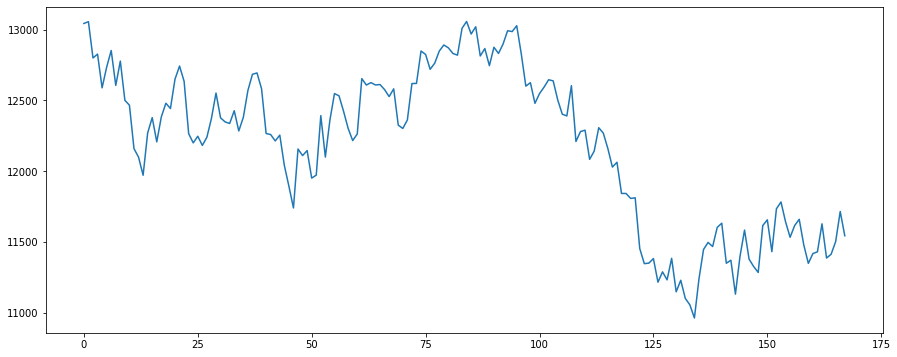

In [68]:
plt.figure(figsize = (15, 6))
plt.plot(dow[:, 5])

### Question 11-5. Now over-plot this plot with a `red dot` marker for every day where the dow was greater than 5.5 billion.

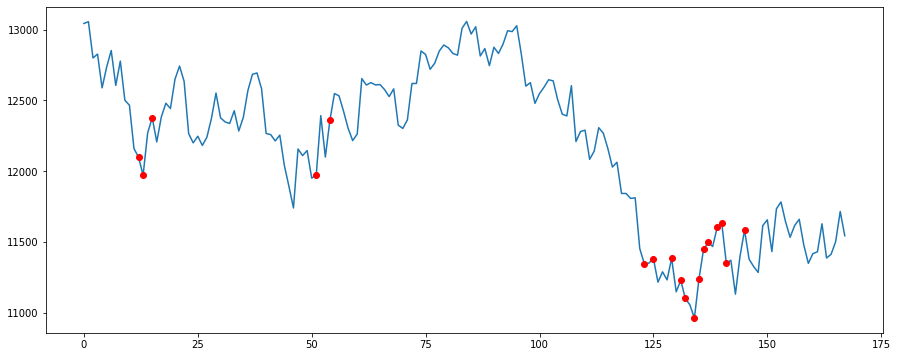

In [69]:
plt.figure(figsize = (15, 6))
plt.plot(dow[:, 5])
plt.plot(high_vol_index, dow[high_vol_index, 5], "ro")

> `Thank you for working with the script :)`

In [70]:
exit()